In [1]:
import networkx as nx
import numpy as np
from numpy import linalg as LA
import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq, kmeans, whiten
from itertools import combinations

In [ ]:
inputfile = '/content/drive/MyDrive/CN/Wiki-Vote.txt'

main_graph = nx.Graph()
with open(inputfile, "r") as file:
    lines = file.readlines()
    for line in lines:
        values = line.strip().split()

        main_graph.add_edges_from([(values[0],
                           values[1])])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def modularity_matrix(G):
  num_node = G.number_of_nodes()
  m = G.number_of_edges()
  nodes = G.nodes()
  B = np.zeros((num_node,num_node))
  for i,node1 in enumerate(nodes):
    for j,node2 in enumerate(nodes):
      t = G.degree[node1]*G.degree[node2]/(2*m)
      if G.has_edge(node1,node2):
            A = 1
      else:
            A = 0
      B[i,j] = A - t
  return B

def dominant_eigenVector(B):
  ### obtain the eigenvalues and eigenvectors of the Modularity
  eigenvalues, eigenvectors = np.linalg.eig(B)
  index = np.argsort(eigenvalues)
  sorted_eigenvalues = eigenvalues[index]
  sorted_eigenvectors = eigenvectors[:,index]
  xn = sorted_eigenvectors[:,-1]
  return xn

def find_clusters(G,xn):
  cluster1 = (np.where(xn<0)[0])
  cluster2 = (np.where(xn>0)[0])
  nodes = list(G.nodes())
  cluster1 = [nodes[i] for i in cluster1]
  cluster2 = [nodes[i] for i in cluster2]
  clusters = [cluster1,cluster2]
  G1 = G.subgraph(cluster1)
  G2 = G.subgraph(cluster2)
  return clusters,G1,G2

def mini_clustering(G):
  B = modularity_matrix(G)
  xn = dominant_eigenVector(B)
  c,G1,G2 = find_clusters(G,xn)
  return c,G1,G2 

In [ ]:
#function for finding modularity measure
def find_modularity(clusters,G):
  m = G.number_of_edges()
  sums = []
  for cluster in clusters:
    sum = 0
    G1 = G.subgraph(cluster)
    nodes = (G1.nodes())
    for node1 in nodes:
      for node2 in nodes:
        t = G1.degree[node1]*G1.degree[node2]/(2*m)
        if G1.has_edge(node1,node2):
          a = 1
        else:
          a = 0
        sum+= a - t
    sums.append(sum)
  return(np.sum(sums)/(2*m))

In [ ]:
modularities = []
all_clusters = []

In [ ]:
def clustering(G,modularity,clusters):

  index = clusters.index(set(G.nodes()))
  last_c = clusters.pop(index)
  print("last_c: ",last_c)
  print("length of last_c: ",len(last_c))
  print("clusters: ",clusters)

  c,G1,G2 = mini_clustering(G)

  print("c:",c)

  clusters.append(set(c[0]))
  clusters.append(set(c[1]))
  print("length of c1: ",len(set(c[0])))
  print("length of c2: ",len(set(c[1])))

  print("clusters: ",clusters)
  all_clusters.append(clusters)

  new_modularity = find_modularity(clusters,main_graph)
  modularities.append(new_modularity)
  print((new_modularity))
  
  if new_modularity < modularity:
    print("**"*100)
    clusters.pop()
    clusters.pop()
    clusters.append(last_c)
    print("clusters with less mod:",clusters)
    return clusters
  


  clustering(G1,new_modularity,clusters)
  clustering(G2,new_modularity,clusters)
  return clusters

In [ ]:
modularity = 0
clusters = []
clusters.append(set(main_graph.nodes)) 
c = clustering(main_graph,modularity,clusters)

last_c:  {'6515', '4911', '3792', '7618', '5730', '6129', '6946', '1017', '4297', '5506', '4457', '4310', '1761', '2301', '5814', '3728', '1050', '2209', '5743', '2496', '3495', '8179', '5623', '7998', '6581', '7014', '2478', '1439', '7678', '6962', '1061', '7057', '5965', '1261', '4598', '6182', '3356', '3538', '2594', '2281', '6380', '8156', '7193', '6410', '1146', '5633', '4645', '4530', '2287', '5811', '5673', '1805', '4617', '2736', '3447', '6155', '721', '1100', '1971', '4205', '6207', '6596', '4583', '4464', '4753', '686', '3941', '7668', '5916', '3744', '7493', '4891', '4761', '3266', '4437', '7386', '4635', '3038', '7540', '5064', '3151', '1004', '3987', '415', '4786', '4687', '1719', '5459', '6090', '4242', '4594', '2821', '8058', '2792', '7240', '2688', '2417', '3550', '2392', '11', '5812', '4223', '3624', '2850', '540', '7347', '3854', '2242', '7194', '3345', '4720', '5815', '2185', '6594', '2558', '1384', '2725', '3536', '1594', '6855', '124', '7020', '3797', '161', '6790'

In [ ]:
print(len(c))

4


In [ ]:
for cc in c :
  print(len(cc))

2074
1690
1618
1729


In [ ]:
import pickle

def write_to_file(file_name,obj):
  with open('/content/drive/MyDrive/CN/'+file_name+'.pickle', 'wb') as f:
      pickle.dump(obj, f)

In [ ]:
write_to_file("clusters",c)

In [3]:
import pickle
with open('/content/drive/MyDrive/CN/clusters.pickle', 'rb') as f:
    clusters2 = pickle.load(f)

In [5]:
textfile = open("idx_Q2.txt", "w",encoding='utf8')
for count,cluster in enumerate(clusters2):
  for element in cluster:
    textfile.write("indx["+str(element) + "]: "+str(count))
    textfile.write("\n")
textfile.close()

In [ ]:
nodes = list(main_graph.nodes())
nodes =[int(a) for a in nodes]
max_node = (max(nodes))

In [ ]:
c1 = clusters2[0]
c2 = clusters2[1]
c3 = clusters2[2]
c4 = clusters2[3]

In [ ]:
idx = np.zeros(max_node)

In [ ]:
def make_idx(c,c_num):
  for a in c:
    if(int(a)<7115):
      idx[int(a)] = int(c_num)

In [ ]:
make_idx(c1,1)
make_idx(c2,2)
make_idx(c3,3)
make_idx(c4,4)

In [ ]:
textfile = open("idx_Q2.txt", "w",encoding='utf8')
for element in idx:
    textfile.write(str(element) + ",")
textfile.close()

Text(0, 0.5, 'modularity')

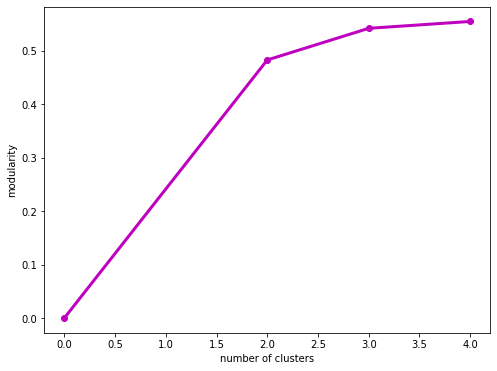

In [ ]:
import matplotlib.pyplot as plt

l = [0,0.48300423173449947,0.5422622342078877,0.55508310027878]
plt.figure(figsize=(8,6))
plt.plot([0,2,3,4],l,'-o',c='m',linewidth='3')
plt.xlabel('number of clusters')
plt.ylabel('modularity')